In [1]:
%matplotlib inline
%run support.py
plt.style.use('~/Shared JupyterHub Notebooks/interactive.mplstyle')

$$P=\frac{\pi^2 B_p^2 d^2 f^2}{6 k \rho D}$$
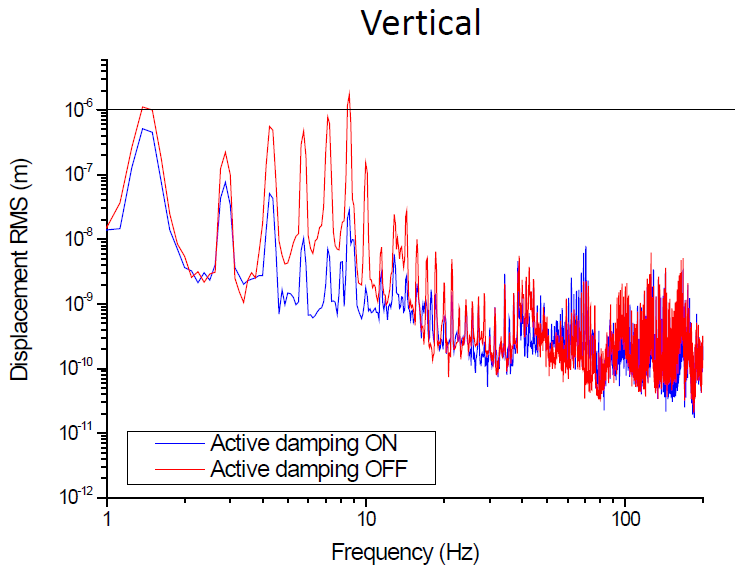!

# Islands

In [2]:
# island dimensions
l = 200e-6
t = 5e-6
w = 39e-6
nmol = 5e-9

d2 = l*l #(l/t)*t**2

vib_length = np.logspace(-6, -4)

# https://drive.switch.ch/index.php/apps/onlyoffice/2926895213
Bp1T = vib_length*2.4/9  # At 9 T, max dB/dz = 2.4 T/m. dz ~ 1 micron for them.
f = np.array([1,2,3,4,5,6,7])*1.4   # There are 7 peaks in vertical vibrations. See above.
k = 1
RRR = 2000 
rho = 16.8e-9 / RRR  # 16.8 nano-ohms-meter at room temperature is the resistivity of copper
D = Cu_rho  # Mass density of copper

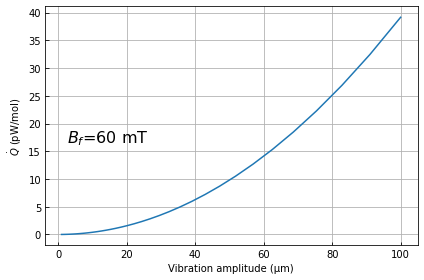

In [3]:
#Bf = np.array([60, 90, 120, 150])*1e-3  # gradient of 
Bf = 0.060 # np.linspace(0, 200, 200)*1e-3
Bp = Bf * Bp1T

Bp2 = np.reshape(Bp*Bp, (len(Bp),1))
f2 = np.reshape(f*f, (len(f),1))
Ppermass = (np.pi*np.pi * d2 * np.sum(np.matmul(Bp2,f2.T), axis=1))/(6 * k * rho * D)  # Power per mass, sum over all peaks in frequency domain
Pmolar = Ppermass * Cu_atomicmass

fig, ax = plt.subplots()
ax.plot(vib_length*1e6, Pmolar*1e12)
ax.set_xlabel(r"Vibration amplitude (µm)")
ax.set_ylabel(r"$\dot{Q}$ (pW/mol)")
ax.text(0.06, 0.43, r"$B_f$=60 mT", fontsize=16, transform=ax.transAxes)
#vib_500 = np.interp([500], Pmolar*1e12, vib_length*1e6)
#print(vib_500)
#ax.set_xticks([0, 250, vib_500[0], 500, 750, 1000])
ax.grid()

# Silver wires

In [5]:
# island dimensions
l = 2e-3

d2 = l*l #(l/t)*t**2

vib_length = np.logspace(-6, -4)

# https://drive.switch.ch/index.php/apps/onlyoffice/2926895213
Bp1T = vib_length*2.4/9  # At 9 T, max dB/dz = 2.4 T/m. dz ~ 1 micron for them.
f = np.array([1,2,3,4,5,6,7])*1.4   # There are 7 peaks in vertical vibrations. See above.
k = 1
RRR = 2000
rho = 15.87e-9 / RRR  # 15.87 nano-ohms-meter at room temperature is the resistivity of copper
Dens = Ag_rho  # Mass density of copper

In [ ]:
#Bf = np.array([60, 90, 120, 150])*1e-3  # gradient of 
Bf = 0.060 # np.linspace(0, 200, 200)*1e-3
Bp = Bf * Bp1T

Bp2 = np.reshape(Bp*Bp, (len(Bp),1))
f2 = np.reshape(f*f, (len(f),1))
Ppermass = (np.pi*np.pi * d2 * np.sum(np.matmul(Bp2,f2.T), axis=1))/(6 * k * rho * Dens)  # Power per mass, sum over all peaks in frequency domain
Pmolar = Ppermass * Cu_atomicmass

fig, ax = plt.subplots()
ax.plot(vib_length*1e6, Pmolar*1e12)
ax.set_xlabel(r"Vibration amplitude (µm)")
ax.set_ylabel(r"$\dot{Q}$ (pW/mol)")
ax.text(0.06, 0.43, r"$B_f$=60 mT", fontsize=16, transform=ax.transAxes)
#vib_500 = np.interp([500], Pmolar*1e12, vib_length*1e6)
#print(vib_500)
#ax.set_xticks([0, 250, vib_500[0], 500, 750, 1000])
ax.grid()